In [ ]:
import pandas as pd 

# Set display options to show the full DataFrame 
pd.set_option('display.max_rows', None) # Show all rows 
pd.set_option('display.max_columns', None) # Show all columns 
pd.set_option('display.width', None) # Adjust the width to fit all columns 

dir_test = "/home/juliantearney/Downloads/" # For PC 
df = pd.read_table(dir_test+'cdfs_v1_6_11.cat', sep=' ') 

# Display the table 
print(df)

In [1]:
import pandas as pd
dir_test = "/home/juliantearney/Downloads/"
c_m_n = pd.read_csv(dir_test+'/control_morphology_nonparametric_multisource.csv')
c_m_n_new =c_m_n[(c_m_n['flag_o3']<=1) & (c_m_n['flag_f210']<=1) & (c_m_n['flag_f180']<=1) & (c_m_n['gini_f180']!=-99) & (c_m_n['gini_o3']!=-99) & (c_m_n['zfourge_id']!=15287.0)]
e_m_n = pd.read_csv(dir_test+'/eelg_morphology_nonparametric_multisource.csv')
e_m_n_new=e_m_n[(e_m_n['flag_o3']<=1) & (e_m_n['flag_f210']<=1) & (e_m_n['flag_f180']<=1) & (e_m_n['gini_o3']!=-99)]

In [2]:

c_m_n_reclass = c_m_n_new.copy()
e_m_n_reclass = e_m_n_new.copy()

# Combine the two DataFrames and sort them by 'zfourge_id'
combined = pd.concat([c_m_n_reclass, e_m_n_reclass], ignore_index=True)
sorted_combined = combined.sort_values(by='zfourge_id')

# Get the 'zfourge_id' column
sord_combined_ids = sorted_combined['zfourge_id']

# Use a set to avoid duplicate IDs
unique_ids = set()

# Convert the IDs to integers and add them to the set
for id in sord_combined_ids:
    unique_ids.add(int(id))

# Convert the set back to a sorted list
int_ids = sorted(list(unique_ids))

print(len(int_ids))
print(int_ids)
print(int_ids[9])

215
[7129, 7172, 7387, 7448, 7453, 7629, 7706, 7814, 7836, 7856, 7867, 7887, 7932, 7968, 8020, 8074, 8116, 8131, 8206, 8207, 8316, 8366, 8643, 8706, 8851, 8926, 8943, 8946, 9048, 9087, 9101, 9179, 9323, 9371, 9512, 9576, 9586, 9652, 9698, 9805, 9845, 10017, 10050, 10066, 10092, 10112, 10214, 10224, 10229, 10287, 10316, 10330, 10388, 10415, 10489, 10668, 10677, 10685, 10730, 10804, 10834, 10926, 10930, 10972, 11068, 11137, 11167, 11172, 11181, 11218, 11303, 11541, 11548, 11714, 11777, 11885, 12030, 12031, 12047, 12087, 12293, 12307, 12348, 12418, 12421, 12422, 12552, 12628, 12694, 12761, 12768, 12811, 12824, 12856, 12898, 12903, 12958, 13155, 13406, 13939, 13954, 14122, 14286, 14310, 14339, 14467, 14672, 14733, 14994, 15097, 15111, 15256, 15401, 15639, 15782, 15870, 15881, 15902, 16072, 16113, 16392, 16476, 16507, 16551, 16705, 16717, 16720, 16764, 16907, 16927, 16933, 17317, 17335, 17408, 17477, 17705, 17719, 17722, 17804, 17810, 17829, 18332, 18459, 18514, 18542, 18645, 18649, 18685, 

In [ ]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5

missing_galaxies = set()
print(len(missing_galaxies))
    
bad_galaxies = [12030, 12694, 12824, 16706, 10112, 7453, 10330, 11068, 14122, 18645, 19762, 21297, 21435, 24110]

def cut_galaxies(file_name,filter, hdu):
    # Load the FITS file and WCS header
    cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'  # Path to your catalog file
    fits_file = f'/home/juliantearney/Downloads/{file_name}.fits'  # Path to your FITS image

    # Read the catalog file to get RA/DEC values (assuming 2 columns: RA, DEC)
    data = pd.read_csv(cat_file, sep=' ', header=0)  # Adjust delimiter if needed
    data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
    ra_values = data['ra'].values
    dec_values = data['dec'].values

    # Open the FITS image to get the data and header
    with fits.open(fits_file) as hdul:
        image_data = hdul[hdu].data
        header = hdul[hdu].header

    # Initialize WCS object
    wcs = WCS(header)

    size = (75,75)*u.pixel
    
    for i in int_ids:
        # pos = SkyCoord(53.16285502, -27.77169206, unit='deg', frame='icrs')
        pos = SkyCoord(ra_values[i-1], dec_values[i-1], unit='deg', frame='icrs')

        cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
        
        # Check if the entire cutout is zero
        if np.sum(cutout.data) == 0:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue  # Skip to the next iteration if the galaxy is missing
        elif i in bad_galaxies:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue  # Skip to the next iteration if the galaxy is missing
        elif i in missing_galaxies:
            continue
        else:
            match_ids = data['id'].values
            print(f'Filter: {filter}')
            print(f'Full ZFOURGE ID: {match_ids[i-1]} vs Google Drive ZFOURGE ID: {i}')
            plt.imshow(cutout.data, cmap='plasma', origin='lower', vmax=np.percentile(cutout.data, 99.9), vmin=np.percentile(cutout.data, 1))
            plt.colorbar()
            plt.show()

cut_galaxies('jades_356', 356, 1)
cut_galaxies('fresco_814', 814, 0)
cut_galaxies('fresco_160', 160, 0)

In [ ]:
import numpy as np
import pandas as pd  # Importing pandas
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
from reproject import reproject_interp
import matplotlib.pyplot as plt
from astropy import units as u

# Load the catalog and the FITS file
cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
fits_file = '/home/juliantearney/Downloads/jades_356.fits'
fits_file_2 = '/home/juliantearney/Downloads/fresco_814.fits'

# Read catalog
data = pd.read_csv(cat_file, sep=' ', header=0)
data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
ra_values = data['ra'].values
dec_values = data['dec'].values

# Load the FITS image
with fits.open(fits_file) as hdul:
    image_data = hdul[1].data
    header = hdul[1].header

with fits.open(fits_file_2) as hdul_2:
    image_data_2 = hdul_2[0].data
    header_2 = hdul_2[0].header

# WCS setup
wcs = WCS(header)
wcs_2 = WCS(header_2)
size = (75, 75) * u.pixel
larger_size = (150, 150) * u.pixel

# Define position (example)
pos = SkyCoord(ra_values[7855], dec_values[7855], unit='deg', frame='icrs')

# Take a larger cutout from the source image
cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
larger_cutout = Cutout2D(image_data, pos, size=larger_size, wcs=wcs)
larger_cutout_2 = Cutout2D(image_data_2, pos, size=larger_size, wcs=wcs_2)

# Now reproject the larger cutout to the target header
reprojected_larger_cutout, _ = reproject_interp((larger_cutout.data, larger_cutout.wcs), larger_cutout_2.wcs, shape_out=larger_cutout_2.data.shape)

# Create a Cutout2D from the reprojected larger cutout
final_cutout = Cutout2D(reprojected_larger_cutout, (larger_cutout_2.center_cutout[1], larger_cutout_2.center_cutout[0]), size=(75, 75), wcs=larger_cutout_2.wcs)

# Display the final cropped image using matplotlib
plt.imshow(cutout.data, cmap='plasma', origin='lower')
plt.colorbar()
plt.title("Original using Cutout2D")
plt.show()

plt.imshow(final_cutout.data, cmap='plasma', origin='lower')
plt.colorbar()
plt.title("Reprojected and Cropped Cutout using Cutout2D")
plt.show()

print(ra_values[7855])
print(dec_values[7855])

In [40]:
import numpy as np
from skimage.transform import resize

def crop_and_resize_image(image, pos, wcs, crop_size, zoom_factor=1):
    """
    Crops and resizes an image around a given position.

    Parameters:
    - image: 2D numpy array, the input image to be cropped.
    - pos: SkyCoord object, the position (RA, Dec) around which to crop.
    - wcs: WCS object, the World Coordinate System for the image.
    - crop_size: tuple of int, the desired output size (width, height) in pixels.
    - zoom_factor: float, the factor by which the image was zoomed before cropping (default is 1).

    Returns:
    - cropped_resized_image: 2D numpy array, the cropped and resized image.
    """
    # Convert the sky position to pixel coordinates
    pixel_coords = wcs.world_to_pixel(pos)

    # If the image is zoomed, adjust the pixel coordinates
    zoom_center_x = pixel_coords[0] * zoom_factor
    zoom_center_y = pixel_coords[1] * zoom_factor

    # Calculate the half-size of the crop
    crop_half_width = crop_size[0] // 2
    crop_half_height = crop_size[1] // 2

    # Define the cropping box around the center of the image
    x_start = int(max(zoom_center_x - crop_half_width, 0))
    x_end = int(min(zoom_center_x + crop_half_width, image.shape[1]))
    y_start = int(max(zoom_center_y - crop_half_height, 0))
    y_end = int(min(zoom_center_y + crop_half_height, image.shape[0]))

    # Crop the image using array slicing
    cropped_image = image[y_start:y_end, x_start:x_end]

    # Resize the cropped image to the desired size
    cropped_resized_image = resize(cropped_image, (crop_size[1], crop_size[0]), mode='reflect')

    return cropped_resized_image

In [5]:
from scipy.ndimage import gaussian_filter

def blur_background(image, target_mask, blur_sigma=2):
    """
    Blur the background of an image while keeping the target region intact.

    Parameters:
        image (ndarray): The input image to process.
        target_mask (ndarray): Binary mask identifying the target region.
        blur_sigma (float): The standard deviation for Gaussian blur.

    Returns:
        ndarray: Image with blurred background and intact target region.
    """
    # Create the background mask (inverse of the target mask)
    background_mask = ~target_mask.astype(bool)

    # Apply Gaussian blur to the entire image
    blurred_image = gaussian_filter(image, sigma=blur_sigma)

    # Combine blurred background with intact target
    result_image = image.copy()
    result_image[background_mask] = blurred_image[background_mask]

    return result_image

In [13]:
from astropy.io import fits
import numpy as np
from astropy import units as u
import pandas as pd

# def redshift_detector(target_index):

cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
data = pd.read_csv(cat_file, sep=' ', header=0)
data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
ra_values = data['ra'].values
dec_values = data['dec'].values
z_spec = data['z_spec'].values
gal_ids = np.array([7172, 7448, 7453, 7629, 7706, 7814, 7836, 7856, 7867, 7887, 7932, 7968, 8020,
        8074, 8116, 8131, 8206, 8207, 8316, 8366, 8643, 8706, 8851, 8926, 8943, 8946,
        9048, 9087, 9101, 9179, 9323, 9512, 9576, 9586, 9652, 9698, 9805, 10017,
        10050, 10066, 10214, 10224, 10229, 10287, 10316, 10330, 10415, 10489, 10668, 10677,
        10685, 10804, 10834, 10926, 10930, 10972, 11068, 11137, 11167, 11172, 11181, 11218,
        11303, 11548, 11714, 11777, 11885, 12031, 12047, 12087, 12293, 12307, 12348, 12418, 12421,
        12422, 12552, 12628, 12761, 12768, 12811, 12856, 12898, 12903, 12958, 13155, 13406, 13939,
        13954, 14122, 14286, 14310, 14339, 14467, 14672, 14733, 14994, 15097, 15111, 15256, 15401,
        15782, 15870, 15881, 15902, 16072, 16392, 16476, 16507, 16551, 16720, 16927, 17317, 17335,
        17408, 17719, 17722, 17804, 17810, 17829, 18332, 18459, 18514, 18542, 18645, 18649, 18691, 18742,
        18856, 19172, 19286, 19310, 19417, 19459, 19491, 19621, 19762, 19796, 19863, 19985, 20257, 20920, 20935,
        21027, 21067, 21297, 21303, 21435, 21731, 21759, 21962, 22136, 22590, 22771, 22919, 23168, 23185, 23488, 23833, 23898, 24110]).astype(int)
index_arr =[]
for i in gal_ids:
    index = np.where(data['id'] == i)[0][0]
    index_arr.append(index)
index_arr = np.array(index_arr).astype(int)    

datapath = '/home/juliantearney/Downloads/'
c0 = fits.open(datapath+'hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits')

def find_galaxy(catalog, ra_target, dec_target, tolerance=1e-6):
    """
    Find a galaxy in a catalog by matching RA and DEC within a specified tolerance.

    Parameters:
        catalog (list of dict): The catalog, where each entry is a dictionary with 'RA' and 'DEC'.
        ra_target (float): The RA of the galaxy to match.
        dec_target (float): The DEC of the galaxy to match.
        tolerance (float): The tolerance for matching RA and DEC (default: 1e-6 degrees).

    Returns:
        list of dict: A list of galaxies matching the target RA and DEC.
    """
    matched_galaxies = []

    for galaxy in catalog:
        ra_diff = abs(galaxy['RA'] - ra_target)
        dec_diff = abs(galaxy['DEC'] - dec_target)
        
        # Check if both RA and DEC differences are within the tolerance
        if ra_diff <= tolerance and dec_diff <= tolerance:
            matched_galaxies.append(galaxy['ID']) # Also appe
    
    return matched_galaxies

target_ra_values = ra_values[index_arr]
target_dec_values = dec_values[index_arr]
target_z_spec_values = z_spec[index_arr]

In [15]:
tol= (35*0.1875)*u.arcsec.to(u.deg)
print(tol)
matched_galaxies = []
for i in range(target_ra_values.size):
    matched_galaxies.append(find_galaxy(catalog=c0[3].data, ra_target=target_ra_values[i], dec_target=target_dec_values[i], tolerance=tol))

0.0018229166666666667


In [16]:
catalog_index = []
for i in range(len(target_ra_values)): # looping through our target galaxies
    index = []
    for j in range(len(matched_galaxies[i])):  # looping through our matched catalog galaxies
        index .append(np.where(c0[3].data['id'] == matched_galaxies[i][j])[0][0])
        
    catalog_index.append(index)
catalog_index = np.array(catalog_index, object)

np.save('catalog_index', catalog_index)

def redshift_detector(target_index): 

    target_index = target_index # index to our galaxies

    ra_catalog  = c0[3] .data['RA']      [catalog_index[target_index]]
    dec_catalog = c0[3] .data['DEC']     [catalog_index[target_index]]
    phot_z      = c0[-1].data['EAZY_z_a'][catalog_index[target_index]]
    z_99l       = c0[-1].data['EAZY_l99'][catalog_index[target_index]] 
    z_99u       = c0[-1].data['EAZY_u99'][catalog_index[target_index]]

    return ra_catalog, dec_catalog, phot_z
  

In [17]:
def get_target_mask(segm_deblend, target_segment_id, segment_centers, ra_catalog, dec_catalog, our_redshifts, target_index, phot_z, threshold):
    
    def get_segment_id(c_ra, c_dec, segment_centers, segm_deblend):
        """
        Returns the segment ID for the given center coordinates (c_ra, c_dec).
        Assumes `segment_centers` is a list of (ra, dec) tuples and that 
        segment IDs are indexed accordingly in `segm_deblend`.
        """
        for idx, (ra, dec) in enumerate(segment_centers):
            if abs(ra - c_ra) < 1e-6 and abs(dec - c_dec) < 1e-6:  # Tolerance for floating-point comparison
                return idx + 1  # Assuming IDs are 1-indexed
        return None  # No matching segment found
    
    """
    Generates a target mask based on segment ID, catalog coordinates, and redshift.
    """
    if target_segment_id is None:
        return None

    # Helper function to check if a segment center matches the catalog coordinates
    def is_within_threshold(center_ra, center_dec):
        return np.any((np.abs(center_ra - ra_catalog) <= threshold) & 
                    (np.abs(center_dec - dec_catalog) <= threshold))

    # Helper function to combine masks
    def combine_masks(mask1, mask2):
        return (mask1 | mask2)  # Logical OR for combining masks
    
    # Initialize the mask with the target_segment_id
    target_mask = segm_deblend.data == target_segment_id
    match_found = False

    for center in segment_centers:  # Loop through SkyCoord objects
        c_ra = center.ra.deg  # Extract RA in degrees
        c_dec = center.dec.deg  # Extract Dec in degrees
        if is_within_threshold(c_ra, c_dec):
            if abs(our_redshifts[target_index] - phot_z) <= 0.1:
                matching_segment_id = get_segment_id(c_ra, c_dec, segment_centers, segm_deblend)
                if matching_segment_id is not None:
                    additional_mask = segm_deblend.data == matching_segment_id
                    target_mask = combine_masks(target_mask, additional_mask)
                    match_found = True
            break  # Exit loop after finding a match


    # If no matches were found, fallback to using the original target_segment_id
    if not match_found:
        target_mask = segm_deblend.data == target_segment_id

    return target_mask

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from photutils.datasets import make_100gaussians_image
from astropy.wcs import WCS
from photutils.segmentation import make_2dgaussian_kernel, detect_sources, deblend_sources
from photutils.background import Background2D, MedianBackground, SExtractorBackground
from photutils.segmentation import SourceCatalog, SegmentationImage
from astropy.visualization import simple_norm
from astropy.nddata import NDData
from astropy import units as u
from photutils.segmentation import detect_threshold
import matplotlib as mpl
# NFFT for Fourier Transforms
import nfft
import os
import sys
from IPython.display import display, HTML
# Astropy Cosmology
from astropy.cosmology import Planck18, FlatLambdaCDM
import pandas as pd  # Importing pandas
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from scipy.ndimage import zoom
from skimage.transform import resize
from astropy.convolution import convolve, Gaussian2DKernel
from photutils.segmentation import deblend_sources

import pandas as pd
from scipy.ndimage import gaussian_filter

# Load the file into a pandas DataFrame
z_file_path = "/home/juliantearney/Downloads/cdfs.v1.6.9.zout"  # Update with the correct path
z_values = pd.read_csv(z_file_path, delim_whitespace=True)  # If space-delimited

our_redshifts = []
for i in gal_ids:
    our_redshifts.append(z_values['z_a'][i-1])

def galaxy_segmentation(image, wcs, target_ra, target_dec, threshold, npixels, zoom_factor, z_ind, target_index):
    """
    Segment galaxies in an image and identify the segment corresponding to a target galaxy.
    This version uses RA and Dec (deg) exclusively and does not use pixel coordinates.
    """
    # Detect threshold and create a segmentation map
    threshold_value = detect_threshold(image, nsigma=threshold)
    segment_map = detect_sources(image, threshold=np.nanmean(threshold_value), npixels=npixels)

    if segment_map is None:
        raise ValueError("No sources were detected in the image.")

    # Create a source catalog for detected segments
    catalog = SourceCatalog(data=image, segment_img=segment_map)

    # Target galaxy coordinates
    target_coord = SkyCoord(ra=target_ra, dec=target_dec, unit='deg', frame='icrs')
    print(f'oringial ra & dec: {target_coord}')
    
    # Convert RA/Dec to pixel coordinates
    target_coord_pixel = wcs.world_to_pixel(target_coord)

    # Round the pixel coordinates to integers
    target_coord_pixel_int = np.round(target_coord_pixel).astype(int)

    # Apply the zoom factor to the pixel coordinates
    target_coord_pixel_scaled = target_coord_pixel_int * zoom_factor

    # Convert the scaled pixel coordinates back to RA/Dec
    target_coord = wcs.pixel_to_world(target_coord_pixel_scaled[0], target_coord_pixel_scaled[1])

    # Variables to store the best match
    min_separation = float("inf")
    target_segment_id = None

    segment_centers = []

    # Find the segment with the shortest separation to the target (using RA/Dec only)
    for idx, segment in enumerate(catalog):
        # Get the centroid in pixel coordinates (assuming centroid is in pixel space)
        segment_centroid_pixel = segment.centroid

        # Convert the pixel centroid to sky coordinates (RA/Dec)
        segment_centroid_sky = wcs.pixel_to_world(segment_centroid_pixel[0], segment_centroid_pixel[1])
        
        segment_centers.append(segment_centroid_sky)
        
        separation = target_coord.separation(segment_centroid_sky).arcsecond

        # Update the best match if a smaller separation is found
        if separation < min_separation:
            min_separation = separation
            target_segment_id = idx + 1  # Segmentation labels are 1-based

    ra_catalog, dec_catalog, phot_z = redshift_detector(z_ind)
    
    threshold = 1e-6
    target_mask = get_target_mask(
    segm_deblend=segment_map,
    target_segment_id=target_segment_id,
    segment_centers=segment_centers,
    ra_catalog=ra_catalog.value if hasattr(ra_catalog, 'value') else ra_catalog,  # Ensure numeric value
    dec_catalog=dec_catalog.value if hasattr(dec_catalog, 'value') else dec_catalog,  # Ensure numeric value
    our_redshifts=our_redshifts,
    target_index=target_index,
    phot_z=phot_z,
    threshold=threshold)

    return image, segment_map.data, target_mask

def galaxy_segmentation_356(image, wcs, target_ra, target_dec, threshold, npixels, zoom_factor, nlevels, contrast, z_ind, target_index):
    """
    Segment galaxies in an image and identify the segment corresponding to a target galaxy.
    This version uses RA and Dec (deg) exclusively and does not use pixel coordinates.
    """
    # Detect threshold and create a segmentation map
    threshold_value = detect_threshold(image, nsigma=threshold)
    gauss_kernel = Gaussian2DKernel(1.5)

    convolved_image = convolve(image, gauss_kernel)
    
    segment_map = detect_sources(convolved_image, threshold=np.nanmean(threshold_value), npixels=npixels)
    if not isinstance(segment_map, SegmentationImage) or segment_map.data.sum() == 0:
        print('nothing here')
        return None, None, None
    
    segm_deblend = deblend_sources(convolved_image, segment_map, npixels=npixels, nlevels=nlevels, contrast=contrast, progress_bar=False)

    if segment_map is None:
        raise ValueError("No sources were detected in the image.")

    # Create a source catalog for detected segments
    catalog = SourceCatalog(data=image, segment_img=segm_deblend, convolved_data=convolved_image)

    # Target galaxy coordinates
    target_coord = SkyCoord(ra=target_ra, dec=target_dec, unit='deg', frame='icrs')
    print(f'oringial ra & dec: {target_coord}')
    
    # Convert RA/Dec to pixel coordinates
    target_coord_pixel = wcs.world_to_pixel(target_coord)

    # Round the pixel coordinates to integers
    target_coord_pixel_int = np.round(target_coord_pixel).astype(int)

    # Apply the zoom factor to the pixel coordinates
    target_coord_pixel_scaled = target_coord_pixel_int * zoom_factor

    # Convert the scaled pixel coordinates back to RA/Dec
    target_coord = wcs.pixel_to_world(target_coord_pixel_scaled[0], target_coord_pixel_scaled[1])

    # Variables to store the best match
    min_separation = float("inf")
    target_segment_id = None
    
    segment_centers = []

    # Find the segment with the shortest separation to the target (using RA/Dec only)
    for idx, segment in enumerate(catalog):
        # Get the centroid in pixel coordinates (assuming centroid is in pixel space)
        segment_centroid_pixel = segment.centroid

        # Convert the pixel centroid to sky coordinates (RA/Dec)
        segment_centroid_sky = wcs.pixel_to_world(segment_centroid_pixel[0], segment_centroid_pixel[1])
        
        segment_centers.append(segment_centroid_sky)
        
        separation = target_coord.separation(segment_centroid_sky).arcsecond

        # Update the best match if a smaller separation is found
        if separation < min_separation:
            min_separation = separation
            target_segment_id = idx + 1  # Segmentation labels are 1-based

    ra_catalog, dec_catalog, phot_z = redshift_detector(z_ind)
    
    threshold = 1e-6
    target_mask = get_target_mask(
    segm_deblend=segm_deblend,
    target_segment_id=target_segment_id,
    segment_centers=segment_centers,
    ra_catalog=ra_catalog.value if hasattr(ra_catalog, 'value') else ra_catalog,  # Ensure numeric value
    dec_catalog=dec_catalog.value if hasattr(dec_catalog, 'value') else dec_catalog,  # Ensure numeric value
    our_redshifts=our_redshifts,
    target_index=target_index,
    phot_z=phot_z,
    threshold=threshold)

    return image, segm_deblend.data, target_mask

cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'

data = pd.read_csv(cat_file, sep=' ', header=0)
data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
ra_values = data['ra'].values
dec_values = data['dec'].values

fits_file = '/home/juliantearney/Downloads/fresco_814.fits'

# Load the FITS image
with fits.open(fits_file) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header

wcs = WCS(header)

broken_gal = [7968]
image = []
segment_map = []
target_mask = []

for i in broken_gal:
    pos = SkyCoord(ra_values[i-1]*u.deg, dec_values[i-1]*u.deg-0.3*u.arcsecond, frame='icrs')
    print(f'pos ra: {pos.ra} & pos dec: {pos.dec}')
    size = (450, 450) * u.pixel
    cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
    zoom_factor = 0.21333
    zoomed_image = zoom(cutout.data, zoom_factor)

    # Segment galaxies and find the targets
    img, seg_map, tgt_mask = galaxy_segmentation(
        image=zoomed_image, 
        wcs=cutout.wcs, 
        target_ra=pos.ra.value, 
        target_dec=pos.dec.value, 
        threshold=1, 
        npixels=4,
        zoom_factor=0.21333,
        z_ind = np.where(gal_ids == 7968)[0][0],
        target_index = 7967
    )
    
    image.append(img)
    segment_map.append(seg_map)
    target_mask.append(tgt_mask)


/tmp/ipykernel_119067/917833547.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  z_values = pd.read_csv(z_file_path, delim_whitespace=True)  # If space-delimited


pos ra: 53.1509781 deg & pos dec: -27.865407333333334 deg
oringial ra & dec: <SkyCoord (ICRS): (ra, dec) in deg
    (53.1509781, -27.86540733)>


In [38]:
target_image = []
noise_filled_image = []
reconstructed_image = []

def process_segmented_image_356(image, segment_map, target_mask, blur_sigma):
    """
    Process a segmented image to extract the target source, reconstruct the background, 
    and blur the background while keeping the target source intact.

    Parameters:
        image (ndarray): The input image.
        segment_map (ndarray): Segmentation map of the image.
        target_mask (ndarray): Binary mask identifying the target source.
        blur_sigma (float): The standard deviation for Gaussian blur on the background.

    Returns:
        tuple: (target_image, noise_filled_image, reconstructed_image)
    """
    # Task 1: Extract the target source image
    target_image = np.zeros_like(image)
    if target_mask is not None:
        target_image[target_mask] = image[target_mask]

    # Task 2: Mask all segments and fill them with noise
    all_segments_mask = segment_map > 0 # Mask for all segments
    background_mask = ~all_segments_mask  # Mask for background (no segments)

    # Estimate noise from the background
    background_pixels = image[background_mask]
    noise_mean = np.mean(background_pixels)
    noise_std = np.std(background_pixels)

    # Generate a noise-filled image
    noise_filled_image = image.copy()
    random_noise = np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape)     
    noise_filled_image[all_segments_mask] = random_noise[all_segments_mask]

    # Task 3: Blur the background while keeping the target source intact
    blurred_image = gaussian_filter(noise_filled_image, sigma=blur_sigma) #Rather than blurring the image, I just want an image filled with random gaussian noise
    reconstructed_image = blurred_image.copy()
    if target_mask is not None:
        reconstructed_image[target_mask] = image[target_mask]  # Restore the target source

    return target_image, noise_filled_image, reconstructed_image

In [52]:
target_image = []
noise_filled_image = []
reconstructed_image = []

def process_segmented_image(image, segment_map, target_mask, blur_sigma=0):
    """
    Process a segmented image to isolate the target source and fill everything else with noise.

    Parameters:
        image (ndarray): The input image.
        segment_map (ndarray): Segmentation map of the image.
        target_mask (ndarray): Binary mask identifying the target source.
        blur_sigma (float): Unused, kept for compatibility.

    Returns:
        tuple: (target_image, noise_filled_image, reconstructed_image)
    """
    # Task 1: Extract the target source image
    target_image = np.zeros_like(image)
    if target_mask is not None:
        target_image[target_mask] = image[target_mask]

    # Estimate noise parameters from the background (non-target areas)
    background_pixels = image[~target_mask]  # Pixels not in the target
    noise_mean = np.mean(background_pixels)
    noise_std = np.std(background_pixels)

    # Generate a noise-filled image
    noise_filled_image = np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape)

    # Task 2: Restore the target source on the noise-filled image
    reconstructed_image = noise_filled_image.copy()
    if target_mask is not None:
        reconstructed_image[target_mask] = image[target_mask]  # Restore the target source

    return target_image, noise_filled_image, reconstructed_image

# Placeholder for your data arrays
# image, segment_map, target_mask need to be defined
target_image = []
noise_filled_image = []
reconstructed_image = []

# Iterate over your image data
for img, seg_map, t_mask in zip(image, segment_map, target_mask):
    tgt_img, noise_img, recon_img = process_segmented_image(
        image=img,
        segment_map=seg_map,
        target_mask=t_mask
    )
    target_image.append(tgt_img)
    noise_filled_image.append(noise_img)
    reconstructed_image.append(recon_img)


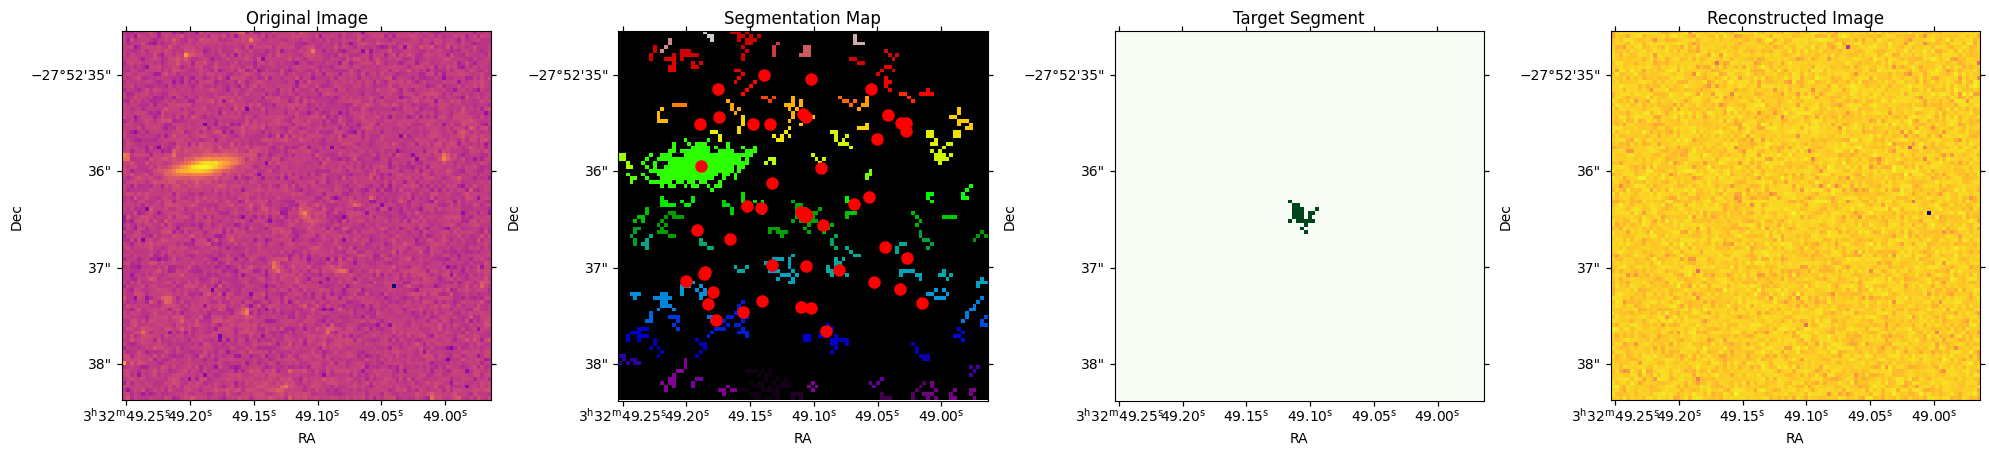

Saved: /home/juliantearney/Downloads/plot_1.png


In [56]:
import os

# Create a directory to save plots if it doesn't exist
output_dir = "/home/juliantearney/Downloads/"
os.makedirs(output_dir, exist_ok=True)

# Loop through images and save each figure
for idx, (img, seg_map, t_mask, recon_img) in enumerate(zip(image, segment_map, target_mask, reconstructed_image)):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={"projection": wcs})

    # Apply simple_norm with logarithmic scaling
    norm_img = simple_norm(img, 'log')
    norm_recon_img = simple_norm(recon_img, 'log')

    # Original Image
    axes[0].imshow(img, origin="lower", cmap="plasma", norm=norm_img)
    axes[0].set_title("Original Image")
    axes[0].set_xlabel("RA")
    axes[0].set_ylabel("Dec")

    # Segmentation Map
    axes[1].imshow(seg_map, origin="lower", cmap="nipy_spectral")
    axes[1].set_title("Segmentation Map")
    axes[1].set_xlabel("RA")
    axes[1].set_ylabel("Dec")
    axes[1].plot(cutout_x, cutout_y, 'ro', markersize=10)
    axes[1].plot(catalog_px * zoom_factor, catalog_py * zoom_factor, marker='o', color='r', markersize=8, linestyle='')

    # Target Segment
    axes[2].imshow(t_mask, origin="lower", cmap="Greens")
    axes[2].set_title("Target Segment")
    axes[2].set_xlabel("RA")
    axes[2].set_ylabel("Dec")

    # Reconstructed Image
    axes[3].imshow(recon_img, origin="lower", cmap="plasma", norm=norm_recon_img)
    axes[3].set_title("Reconstructed Image")
    axes[3].set_xlabel("RA")
    axes[3].set_ylabel("Dec")
    
    plt.tight_layout()
    plt.show()

    # Save the figure
    plot_filename = os.path.join(output_dir, f"plot_{idx+1}.png")
    fig.savefig(plot_filename, dpi=300, bbox_inches="tight")
    print(f"Saved: {plot_filename}")

    plt.close(fig)  # Close the figure to free up memory


In [ ]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from reproject import reproject_interp
from scipy.ndimage import zoom
from skimage.transform import resize
from scipy.ndimage import gaussian_filter, binary_dilation
from skimage.exposure import match_histograms

missing_galaxies = set()
bad_galaxies = [12030, 12694, 12824, 11541, 10092, 9845, 9371, 15639]

all_segment_maps = {}  
all_target_masks = {}  

def cut_galaxies(file_name, filter, hdu):
    
    cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
    fits_file = f'/home/juliantearney/Downloads/{file_name}.fits'
    data = pd.read_csv(cat_file, sep=' ', header=0)
    data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
    ra_values = data['ra'].values
    dec_values = data['dec'].values

    with fits.open(fits_file) as hdul:
        image_data = hdul[hdu].data
        header = hdul[hdu].header
        
    with fits.open('/home/juliantearney/Downloads/fresco_814.fits') as hdul_2:
        image_data_2 = hdul_2[0].data
        header_2 = hdul_2[0].header    
        
    wcs = WCS(header)
    wcs_2 = WCS(header_2)
    massive_size = (450, 450) * u.pixel
    crop_size = (75, 75) * u.pixel
    cutouts = {}
    wcs_cutouts = {}

    for i in  int_ids:
        pos = SkyCoord(ra_values[i-1]*u.deg, dec_values[i-1]*u.deg-0.3*u.arcsecond, frame='icrs')
        
        if i in bad_galaxies:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue

        elif filter==356:
            cutout = Cutout2D(image_data, pos, size=massive_size, wcs=wcs)
            if np.sum(cutout.data) == 0:
                missing_galaxies.add(data['id'].iloc[i-1])
                continue
            zoom_factor = 0.159971962 
            zoomed_image = zoom(cutout.data, zoom_factor)
            z_ind = np.where(gal_ids == i)[0][0]
            image, segment_map, target_mask = galaxy_segmentation_356(image=zoomed_image, wcs=cutout.wcs, target_ra=pos.ra, target_dec=pos.dec, threshold=1, npixels=3, zoom_factor = 0.159971962, nlevels=32, contrast=0.0001, z_ind=z_ind, target_index=i-1)
            all_segment_maps[i] = segment_map
            all_target_masks[i] = target_mask
            target_image, noise_filled_image, reconstructed_image = process_segmented_image_356(image=image, segment_map=segment_map, target_mask=target_mask, blur_sigma=0)
            cropped_resized_image = crop_and_resize_image(reconstructed_image, pos, cutout.wcs, crop_size=(75, 75), zoom_factor=zoom_factor)
            # Histogram matching to the 814 filter
            cropped_resized_image = match_histograms(cropped_resized_image, cutouts_814[data['id'].iloc[i-1]])
            cutouts[data['id'].iloc[i-1]] = cropped_resized_image
        
        elif data['id'].iloc[i-1] in missing_galaxies:
            continue
        
        else:
            cutout = Cutout2D(image_data, pos, size=massive_size, wcs=wcs)
            if filter==814:
                target_wcs = WCS(cutout.wcs.to_header())
                reprojected_image, _ = reproject_interp((image_data, wcs), target_wcs, shape_out=cutout.data.shape)

                zoom_factor = 0.159971962 
                zoomed_image = zoom(reprojected_image, zoom_factor)

                # Use the segmentation map and target mask from the 356 filter for this galaxy
                segment_map = all_segment_maps.get(i)
                target_mask = all_target_masks.get(i)

                target_image, noise_filled_image, reconstructed_image = process_segmented_image(image=zoomed_image, segment_map=segment_map, target_mask=target_mask, blur_sigma=0)
                cropped_resized_image = crop_and_resize_image(reconstructed_image, pos, cutout.wcs, crop_size=(75, 75), zoom_factor=zoom_factor)
                cutouts[data['id'].iloc[i-1]] = cropped_resized_image
            else:
                target_wcs = WCS(cutout.wcs.to_header())
                reprojected_image, _ = reproject_interp((image_data, wcs), target_wcs, shape_out=cutout.data.shape)

                zoom_factor = 0.159971962 
                zoomed_image = zoom(reprojected_image, zoom_factor)

                # Use the segmentation map and target mask from the 356 filter for this galaxy
                segment_map = all_segment_maps.get(i)
                target_mask = all_target_masks.get(i)

                target_image, noise_filled_image, reconstructed_image = process_segmented_image(image=zoomed_image, segment_map=segment_map, target_mask=target_mask, blur_sigma=0)
                cropped_resized_image = crop_and_resize_image(reconstructed_image, pos, cutout.wcs, crop_size=(75, 75), zoom_factor=zoom_factor)
                # Histogram matching to the 814 filter
                cropped_resized_image = match_histograms(cropped_resized_image, cutouts_814[data['id'].iloc[i-1]])
                cutouts[data['id'].iloc[i-1]] = cropped_resized_image
                
        print(f'{i} cut out done')

    return cutouts
 
# Collect cutouts for each filter
cutouts_356 = cut_galaxies('jades_356', 356, 1)
cutouts_814 = cut_galaxies('fresco_814', 814, 0)
cutouts_160 = cut_galaxies('fresco_160', 160, 0)

# Ensure each galaxy's cutouts are stacked into a consistent 3D array
combined_cutouts_list = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_814 and galaxy_id in cutouts_160:
        stacked_cutouts = np.stack([
            cutouts_814[galaxy_id],
            cutouts_160[galaxy_id],
            cutouts_356[galaxy_id],
        ])
        combined_cutouts_list.append(stacked_cutouts)

# Convert list to a 4D NumPy array
combined_cutouts_array = np.stack(combined_cutouts_list).astype(np.float32)

# Save the 4D array to a single FITS file
hdu = fits.PrimaryHDU(data=combined_cutouts_array)
hdu_list = fits.HDUList([hdu])
hdu_list.writeto(dir_test + 'combined_cutouts.fits', overwrite=True)


In [12]:
with fits.open('/home/juliantearney/Downloads/jades_356.fits') as hdul_2:
        image_data_2 = hdul_2[1].data
        header_2 = hdul_2[1].header

wcs_2 = WCS(header_2)
print(header_2)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                25000                                                  NAXIS2  =                27700                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               EXTNAME = 'SCI     '           / extension name                                 MJD-BEG =    59859.93253512118 / [d] exposure start time in MJD                 MJD-AVG =    59860.06815307564 / [d] exposure mid-point in MJD                  MJD-END =    59860.20381251157 / [d] exposure end time in MJD                   TDB-BEG =      59859.935286724 / [d] TDB time of exposure start in MJD          TDB-MID =    59860.07091199837 / [d] TDB

Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [40]:
# Ensure each galaxy's cutouts are stacked into a consistent 3D array
combined_cutouts_list_814 = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_814 and galaxy_id in cutouts_814:
        stacked_cutouts_814 = np.stack([
            cutouts_814[galaxy_id],
            cutouts_814[galaxy_id],
            cutouts_814[galaxy_id],
        ])
        combined_cutouts_list_814.append(stacked_cutouts_814)

# Convert list to a 4D NumPy array
combined_cutouts_array_814 = np.stack(combined_cutouts_list_814).astype(np.float32)

# Save the 4D array to a single FITS file
hdu_814 = fits.PrimaryHDU(data=combined_cutouts_array_814)
hdu_list_814 = fits.HDUList([hdu_814])
hdu_list_814.writeto(dir_test + 'combined_cutouts_814.fits', overwrite=True)

In [41]:
# Ensure each galaxy's cutouts are stacked into a consistent 3D array
combined_cutouts_list_160 = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_160 and galaxy_id in cutouts_160:
        stacked_cutouts_160 = np.stack([
            cutouts_160[galaxy_id],
            cutouts_160[galaxy_id],
            cutouts_160[galaxy_id],
        ])
        combined_cutouts_list_160.append(stacked_cutouts_160)

# Convert list to a 4D NumPy array
combined_cutouts_array_160 = np.stack(combined_cutouts_list_160).astype(np.float32)

# Save the 4D array to a single FITS file
hdu_160 = fits.PrimaryHDU(data=combined_cutouts_array_160)
hdu_list_160 = fits.HDUList([hdu_160])
hdu_list_160.writeto(dir_test + 'combined_cutouts_160.fits', overwrite=True)

In [172]:
# Ensure each galaxy's cutouts are stacked into a consistent 3D array
combined_cutouts_list_356 = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_356 and galaxy_id in cutouts_356:
        stacked_cutouts_356 = np.stack([
            cutouts_356[galaxy_id],
            cutouts_356[galaxy_id],
            cutouts_356[galaxy_id],
        ])
        combined_cutouts_list_356.append(stacked_cutouts_356)

# Convert list to a 4D NumPy array
combined_cutouts_array_356 = np.stack(combined_cutouts_list_356).astype(np.float32)

# Save the 4D array to a single FITS file
hdu_356 = fits.PrimaryHDU(data=combined_cutouts_array_356)
hdu_list_356 = fits.HDUList([hdu_356])
hdu_list_356.writeto(dir_test + 'combined_cutouts_356.fits', overwrite=True)

In [27]:
print(missing_galaxies)
print(len(missing_galaxies))

# Loop through int_ids and print IDs not in missing_galaxies
galaxy_ids = []
for galaxy_id in int_ids:
    if galaxy_id not in missing_galaxies:
        galaxy_ids.append(galaxy_id)
        
print(galaxy_ids[150])


set()
0
18742


In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Load the FITS file
file_path = "/home/juliantearney/Downloads/combined_cutouts.fits"
with fits.open(file_path) as hdul:
    data = hdul[0].data  # The 4D array: [num_galaxies, num_filters, height, width]

num_galaxies = data.shape[0]  # Number of galaxies
num_filters = data.shape[1]   # Number of filters (3 in your case)

# List indicating merger (1) or non-merger (0) for each galaxy
merger_list = [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]


# Loop through each galaxy
for galaxy_idx in range(num_galaxies):
    galaxy_data = data[galaxy_idx]  # 3D array for the current galaxy

    # Determine if the galaxy is a merger or non-merger
    galaxy_label = "Merger" if merger_list[galaxy_idx] == 1 else "Non-Merger"
    
    # Create a subplot for each filter image of the galaxy
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 5))
    fig.suptitle(f'Galaxy {galaxy_idx + 1}: {galaxy_label}')

    for filter_idx in range(num_filters):
        norm = simple_norm(galaxy_data[filter_idx, :, :], 'log', min_percent=0, max_percent=100)
        axs[filter_idx].imshow(galaxy_data[filter_idx, :, :], cmap='plasma', origin='lower', norm=norm)
        axs[filter_idx].set_title(f'Filter {filter_idx + 1}')
        axs[filter_idx].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Load the FITS file
file_path = "/home/juliantearney/Downloads/combined_cutouts_close_no_seg.fits"
with fits.open(file_path) as hdul:
    data = hdul[0].data  # The 4D array: [num_galaxies, num_filters, height, width]

num_galaxies = data.shape[0]  # Number of galaxies
num_filters = data.shape[1]    # Number of filters (3 in your case)


# Loop through each galaxy
for galaxy_idx in range(num_galaxies):
    galaxy_data = data[galaxy_idx]  # 3D array for the current galaxy
    
    # Create a subplot for each filter image of the galaxy
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 5))
    fig.suptitle(f'Galaxy {galaxy_idx + 1}')

    for filter_idx in range(num_filters):
        norm = simple_norm(galaxy_data[filter_idx, :, :], 'log')  # Apply logarithmic scaling
        axs[filter_idx].imshow(galaxy_data[filter_idx, :, :], cmap='plasma', origin='lower', norm=norm)
        axs[filter_idx].set_title(f'Filter {filter_idx + 1}')
        axs[filter_idx].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
from astropy.io import fits
from astropy.utils.data import download_file

file_url = 'https://archive.stsci.edu/hlsps/deepmerge/hlsp_deepmerge_hst-jwst_acs-wfc3-nircam_illustris-z2_f814w-f160w-f356w_v1_sim-noisy.fits'
hdu_sim = fits.open(download_file(file_url, cache=True, show_progress=True))

data = hdu_sim[0].data
header_sim = hdu_sim[0].header

num_galaxies = data.shape[0]  # Number of galaxies
num_filters = data.shape[1]    # Number of filters (3 in your case)


# Loop through each galaxy
for galaxy_idx in range(num_galaxies):
    galaxy_data = data[galaxy_idx]  # 3D array for the current galaxy
    
    # Create a subplot for each filter image of the galaxy
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 5))
    fig.suptitle(f'Galaxy {galaxy_idx + 1}')

    for filter_idx in range(num_filters):
        norm = simple_norm(galaxy_data[filter_idx, :, :], 'log')  # Apply logarithmic scaling
        axs[filter_idx].imshow(galaxy_data[filter_idx, :, :], cmap='plasma', origin='lower', norm=norm)
        axs[filter_idx].set_title(f'Filter {filter_idx + 1}')
        axs[filter_idx].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
wsc_sim = WCS(header_sim)
print(header_sim)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    4 / number of array dimensions                     NAXIS1  =                   75                                                  NAXIS2  =                   75                                                  NAXIS3  =                    3                                                  NAXIS4  =                15426                                                  EXTEND  =                    T                                                  NAME1   = 'ImageX  '                                                            NAME2   = 'ImageY  '                                                            NAME3   = 'filter  '           / F814W,F356W,F160W                              NAME4   = 'object  '                                                            EXTNAME = 'Images  '                    